# Exploring Titanic Dataset

### Questions:
* How does gender affect different aspects of survivorship

In [78]:
# Import magic
%matplotlib inline

# More imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (18, 8)})

In [131]:
# Load CSV data
titanic_data = pd.read_csv('titanic_data.csv')

survived = titanic_data[titanic_data['Survived'] == 1]
died = titanic_data[titanic_data['Survived'] == 0]

In [60]:
gender_grouped = titanic_data.groupby('Sex')
gender_died = died.groupby('Sex')
gender_survived = survived.groupby('Sex')

Sex
female    [[Axes(0.125,0.563043;0.336957x0.336957), Axes...
male      [[Axes(0.125,0.563043;0.336957x0.336957), Axes...
dtype: object

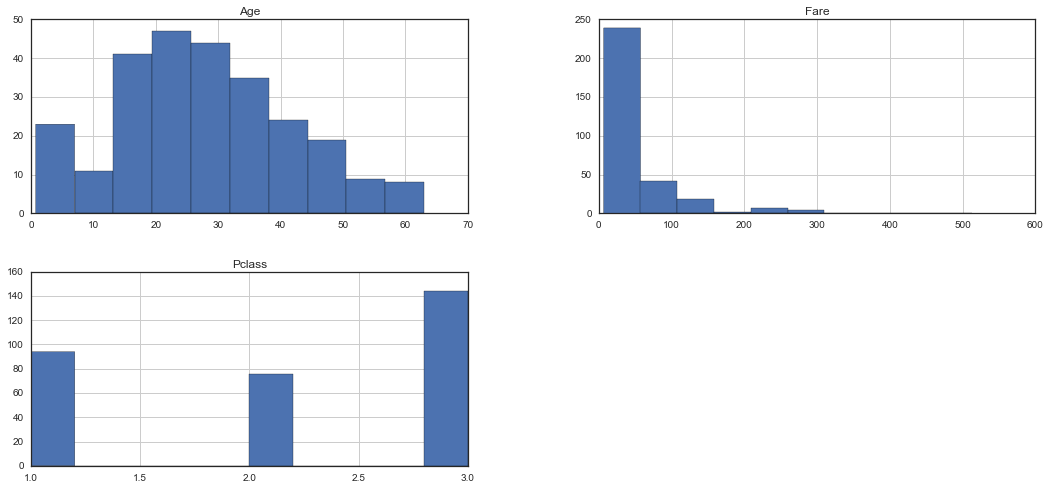

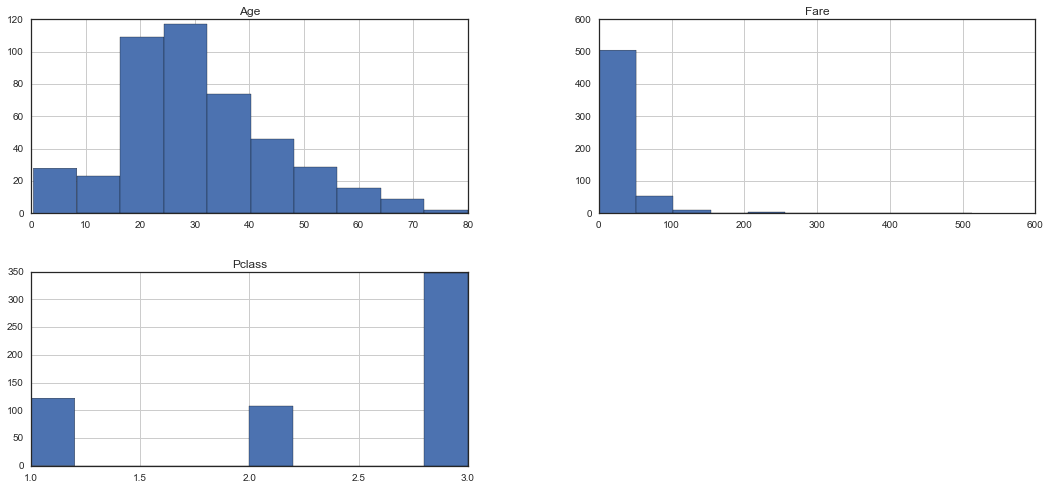

In [79]:
gender_grouped.hist(column=['Fare', 'Age', 'Pclass'])

Not really what I was looking for. Was hoping to see survived and died side by side.

In [63]:
# Not null ages
female_survived_nn = gender_survived.get_group('female')[pd.notnull(gender_survived.get_group('female')['Age'])]
female_died_nn = gender_died.get_group('female')[pd.notnull(gender_died.get_group('female')['Age'])]

male_survived_nn = gender_survived.get_group('male')[pd.notnull(gender_survived.get_group('male')['Age'])]
male_died_nn = gender_died.get_group('male')[pd.notnull(gender_died.get_group('male')['Age'])]

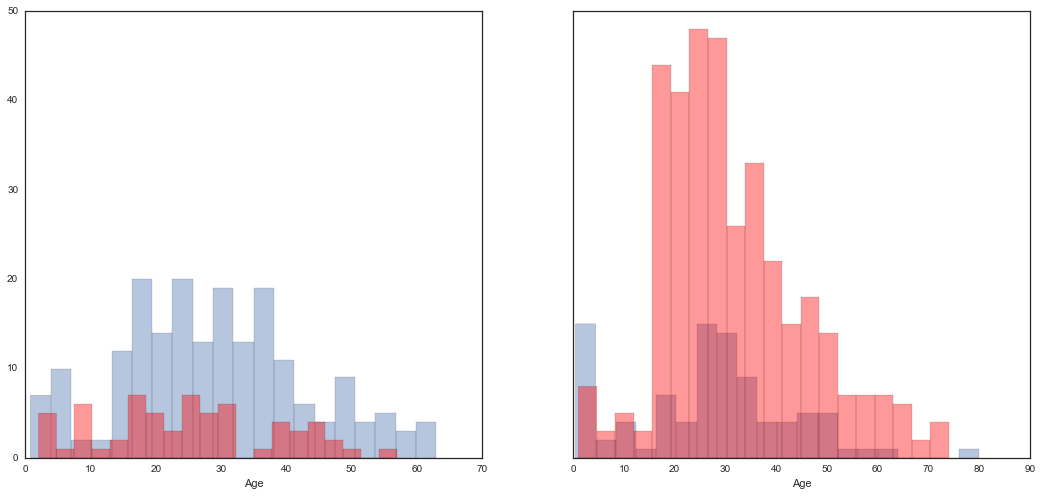

In [113]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)

sns.distplot(female_survived_nn['Age'], kde=False, ax=ax1, bins=20)
sns.distplot(male_survived_nn['Age'], kde=False, ax=ax2, bins=20)

sns.distplot(female_died_nn['Age'], kde=False, ax=ax1, color='r', bins=20)
sns.distplot(male_died_nn['Age'], kde=False, ax=ax2, color='r', bins=20)

Interesting graph, but I think there might be something less obvious.